In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data_set = np.genfromtxt("univariate_regression_data_set.csv", skip_header=1, delimiter = ",", )


x_train = data_set[:,0]
y_train = data_set[:,1].astype(int)
x_test = data_set[150:,0]
y_test = data_set[150:,1].astype(int)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272,)
(272,)
(122,)
(122,)


In [27]:
import math
max_x=max(x_train)
min_x=min(x_train)
n=len(x_train)
bin_n=math.sqrt(n)


print(max_x,min_x,n,bin_n)

5.1 1.6 272 16.492422502470642


In [4]:
print(x_train)

[3.6   1.8   3.333 2.283 4.533 2.883 4.7   3.6   1.95  4.35  1.833 3.917
 4.2   1.75  4.7   2.167 1.75  4.8   1.6   4.25  1.8   1.75  3.45  3.067
 4.533 3.6   1.967 4.083 3.85  4.433 4.3   4.467 3.367 4.033 3.833 2.017
 1.867 4.833 1.833 4.783 4.35  1.883 4.567 1.75  4.533 3.317 3.833 2.1
 4.633 2.    4.8   4.716 1.833 4.833 1.733 4.883 3.717 1.667 4.567 4.317
 2.233 4.5   1.75  4.8   1.817 4.4   4.167 4.7   2.067 4.7   4.033 1.967
 4.5   4.    1.983 5.067 2.017 4.567 3.883 3.6   4.133 4.333 4.1   2.633
 4.067 4.933 3.95  4.517 2.167 4.    2.2   4.333 1.867 4.817 1.833 4.3
 4.667 3.75  1.867 4.9   2.483 4.367 2.1   4.5   4.05  1.867 4.7   1.783
 4.85  3.683 4.733 2.3   4.9   4.417 1.7   4.633 2.317 4.6   1.817 4.417
 2.617 4.067 4.25  1.967 4.6   3.767 1.917 4.5   2.267 4.65  1.867 4.167
 2.8   4.333 1.833 4.383 1.883 4.933 2.033 3.733 4.233 2.233 4.533 4.817
 4.333 1.983 4.633 2.017 5.1   1.8  ]


In [3]:
print(y_train)

[79 54 74 62 85 55 88 85 51 85 54 84 78 47 83 52 62 84 52 79 51 47 78 69
 74 83 55 76 78 79 73 77 66 80 74 52 48 80 59 90 80 58 84 58 73 83 64 53
 82 59 75 90 54 80 54 83 71 64 77 81 59 84 48 82 60 92 78 78 65 73 82 56
 79 71 62 76 60 78 76 83 75 82 70 65 73 88 76 80 48 86 60 90 50 78 63 72
 84 75 51 82 62 88 49 83 81 47 84 52 86 81 75 59 89 79 59 81 50 85 59 87
 53 69 77 56 88 81 45 82 55 90 45 83 56 89 46 82 51 86 53 79 81 60 82 77
 76 59 80 49 96 53]


In [4]:
origin = 1.5
bin_width = 0.37

max_x = max(x_train)

left_borders = np.arange(origin, max_x, bin_width)
right_borders = np.arange(origin + bin_width, max_x + bin_width, bin_width)
data_interval = np.arange(origin, max_x, 0.001)

In [5]:
print(left_borders)
print(right_borders)
print(data_interval)

[1.5  1.87 2.24 2.61 2.98 3.35 3.72 4.09 4.46 4.83]
[1.87 2.24 2.61 2.98 3.35 3.72 4.09 4.46 4.83 5.2 ]
[1.5   1.501 1.502 ... 5.097 5.098 5.099]


# Regressogram

In [9]:
def regressogram(index):
    sums = 0
    count = 0
    for i in range(x_train.shape[0]):
        if(left_borders[index] < x_train[i] and x_train[i] <= right_borders[index]):
            sums +=  y_train[i]
            count += 1
    result = sums / count
    return result

In [10]:
p_hat = [regressogram(i) for i in range(left_borders.shape[0])]

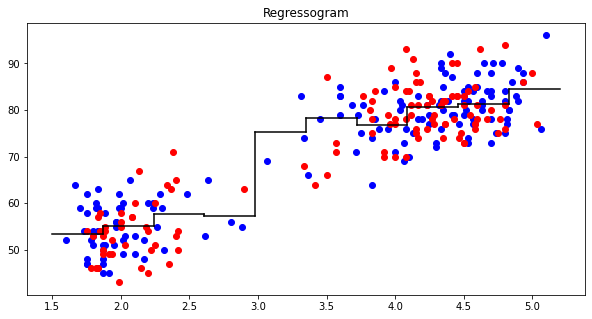

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
for j in range(len(left_borders)):
    plt.plot([left_borders[j], right_borders[j]], [p_hat[j], p_hat[j]], "k-")
for j in range(len(left_borders) - 1):
    plt.plot([right_borders[j], right_borders[j]], [p_hat[j], p_hat[j + 1]], "k-")    
plt.title("Regressogram")
plt.show()

In [12]:
rmse = 0
for i in range(0,len(x_test)):
    for j in range(0,len(left_borders)):
        if(left_borders[j] < x_test[i] and x_test[i] <= right_borders[j]):
            err = (y_test[i] - p_hat[int((x_test[i]-origin)/bin_width)])**2
            rmse += err
result = np.sqrt(rmse / len(x_test))
print("Regressogram => RMSE is", result, " when h is", bin_width)

Regressogram => RMSE is 5.962617204275407  when h is 0.37


# Mean Smoother

In [28]:
def mean_smoother(index):
    sums = 0
    count = 0
    for i in range(x_train.shape[0]):
        if(np.abs((data_interval[index]-x_train[i])/bin_width) < 0.5):
            sums +=  y_train[i]
            count += 1
    result = sums / count
    return result

In [29]:
p_hat_ms = np.array([mean_smoother(i) for i in range(data_interval.shape[0])])

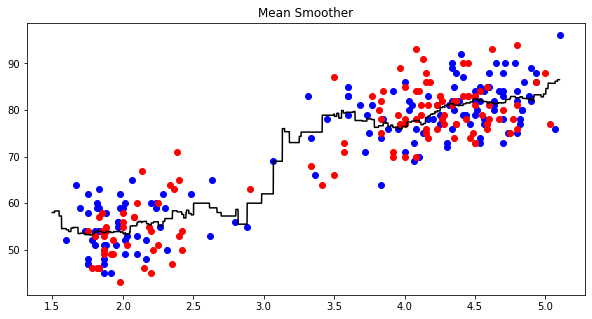

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_ms, "k")
plt.title("Mean Smoother")
plt.show()

In [31]:
Rmse = np.sqrt(np.sum([(y_test[i] - p_hat_ms[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]) / len(x_test))
print("Running Mean Smoother => RMSE is", Rmse, " when h is", bin_width)

Running Mean Smoother => RMSE is 6.085457746924621  when h is 0.37


# Kernel Smoother

In [36]:
def kernel_smoother(index):
    sums = 0
    counts = 0
    for i in range(0,len(x_train)): 
        g = 1/np.sqrt(2* np.pi) * np.exp(-1* ((data_interval[index] - x_train[i]) / bin_width) ** 2 / 2)
        sums += (g * y_train[i])
        counts += g
    result = sums / counts
    return result

In [37]:
p_hat_kernel = np.array([kernel_smoother(i) for i in range(data_interval.shape[0])])

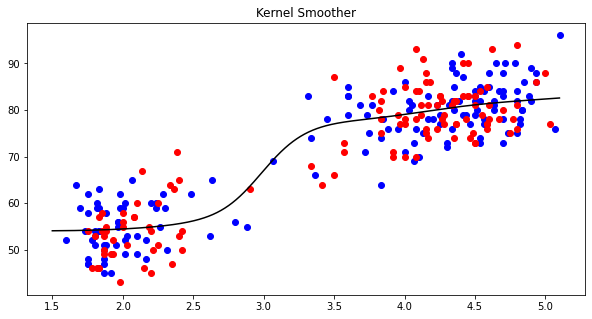

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.plot(data_interval, p_hat_kernel, "k")
plt.title("Kernel Smoother")
plt.show()

In [39]:
Rmse = np.sqrt(np.sum([(y_test[i] - p_hat_kernel[int((x_test[i]-origin)*1000)])**2 for i in range(len(x_test))]) / len(x_test))
print("Kernel Smoother => RMSE is", Rmse, " when h is", bin_width)

Kernel Smoother => RMSE is 5.874019808179156  when h is 0.37
